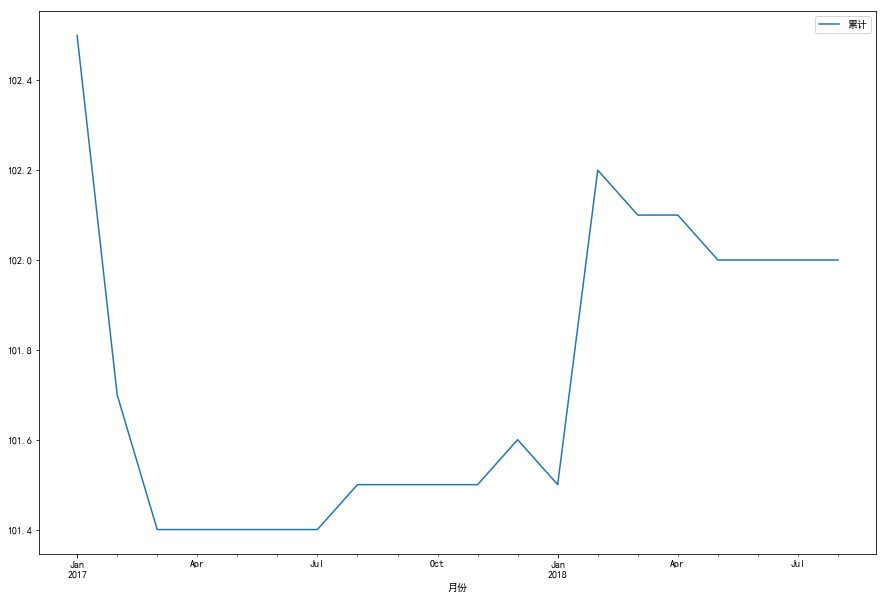

In [3]:
from lxml import etree
import requests
import chardet
import pandas as pd
#人民币消费指数
url='http://forex.eastmoney.com/CNY.html'
r=requests.get(url)
# r.encoding=r.apparent_encoding
chardet.detect(r.content)
# r.content.decode('utf8')
rec=r.content.decode('utf8')
response=etree.HTML(rec)
trs=response.xpath('//div[@class="dataCont"]/table/tr')
l2=[]
for tr in trs[2:]:
    tds=tr.xpath('td/text()')
    l1=[]
    for td in tds[:5]:
        l1.append(td)
    l2.append(l1)
l2
columns=['月份']
columns.extend(trs[1].xpath('td/text()')[:6])
columns.pop(3)
columns.pop(4)
df=pd.DataFrame(l2,columns=columns)
df.累计=df.累计.astype(float)
df['月份']=df['月份'].str.replace('[年,月,份]','')
f=lambda a:a[:4]+'.'+a[-2:]
df['月份']=df['月份'].map(f)
df.sort_values(by='月份',inplace=True)
df.月份=pd.to_datetime(df['月份'])
df.plot(x='月份',y='累计',figsize=[15,10])


In [134]:
c=['月份']
c.extend(trs[1].xpath('td/text()')[:6])
c.pop(3)
c.pop(4)
c

['月份', '当月', '同比 ', '环比 ', '累计']

In [81]:
import sys
 
sys.getdefaultencoding()

'utf-8'

In [4]:
tds

['2017年01月份',
 '102.50',
 '2.50%',
 '1.00%',
 '102.50',
 '102.60',
 '2.60%',
 '1.00%',
 '102.60',
 '102.20',
 '2.20%',
 '0.90%',
 '102.20']

In [2]:
'何丹 '.encode('utf8')

b'\xe4\xbd\x95\xe4\xb8\xb9 '